In [5]:
##### Imports #####
import os
import matplotlib.pyplot as plt
import pysam


reference_path = "/groups/genscale/nimauric/ZymoD6331/Zymo_merged.fasta"
reads_alignement_path = "../outputs/zymo/reads_on_reference.Zymo_merged.bam"
contigs_alignement_path = "../outputs/zymo/metaMDBG/contigs_on_reference.Zymo_merged.bam"

In [2]:
# genome : [genome_size, read_genome_fraction, contig_genome_fraction]
genome_fractions = {}

# Get genome size
reference = pysam.FastaFile(reference_path)
for name, length in zip(reference.references, reference.lengths) : 
    name = "_".join(name.split("_")[:-1])
    if name not in genome_fractions.keys() : 
        genome_fractions[name] = [0,0,0]
    genome_fractions[name][0] += length

# Get genome fractions
def get_covered_bases(path, genome_fractions, index) : #index : 1 for reads, 2 for contig
    bamfile = pysam.AlignmentFile(path, "rb")
    for pileupcolumn in bamfile.pileup():
        if pileupcolumn.nsegments >= 1 : 
            name = "_".join(pileupcolumn.reference_name.split("_")[:-1])
            genome_fractions[name][index] += 1
            
    for name in genome_fractions : 
        genome_fractions[name][index] /= genome_fractions[name][0]
    

get_covered_bases(reads_alignement_path, genome_fractions, 1)
get_covered_bases(contigs_alignement_path, genome_fractions, 2)


genome_fractions


[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Zymo_merged.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Zymo_merged.bam.bai


{'Akkermansia_muciniphila': [2851480, 1.0, 1.0],
 'Candida_albican': [12575386, 0.8701837860086362, 0.7942817023668299],
 'Enterococcus_faecalis': [2845392, 0.05727506087034757, 0.0],
 'Escherichia_coli_B3008': [4739263, 1.0, 0.2919287239387221],
 'Faecalibacterium_prausnitzii': [2913920, 1.0, 0.9999975977377553],
 'Methanobrevibacter_smithii': [1853160,
  0.9988155367048717,
  0.9979726521185435],
 'Saccharomyces_cerevisiae': [12843354,
  0.9229956598564518,
  0.8247727190265097],
 'Bacteroides_fragilis': [5166942, 1.0, 0.9999043921917451],
 'Clostridioides_difficile': [4209110, 1.0, 0.999948920318072],
 'Escherichia_coli_B1109': [4875441, 0.9982639519173753, 0.4942084213510121],
 'Escherichia_coli_B766': [5190606, 0.9886331191386901, 0.5959502609136582],
 'Fusobacterium_nucleatum': [2448186, 1.0, 0.999596844357414],
 'Prevotella_corporis': [2947105, 0.9999952495754308, 0.9994615054434776],
 'Salmonella_enterica': [4759746, 0.48849077240676286, 0.12565250330584868],
 'Bifidobacterium_

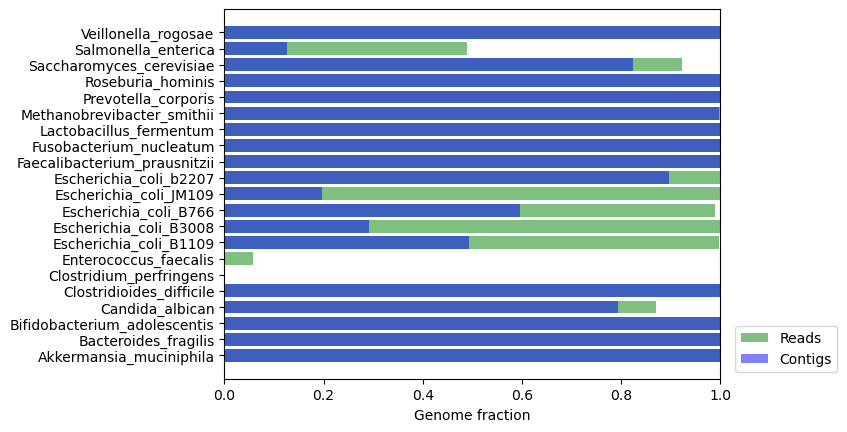

In [3]:
### Visual
genome_fractions = dict(sorted(genome_fractions.items()))
reads_genome_fraction = [tup[1] for tup in genome_fractions.values()]
contigs_genome_fraction = [tup[2] for tup in genome_fractions.values()]
reference_names = list(genome_fractions.keys())


# Creating barplots
plt.barh(reference_names, reads_genome_fraction, color='green', label="Reads", alpha=0.5)
plt.barh(reference_names, contigs_genome_fraction, color='blue', label="Contigs", alpha=0.5)

# Adding labels and title
plt.xlabel("Genome fraction")
plt.xlim(right=1)

plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))

In [9]:
# genome : [genome_size, [coverage count], [average coverage depth, median coverage depth]]
coverage_depth = {}

# Get genome size
reference = pysam.FastaFile(reference_path)
for name, length in zip(reference.references, reference.lengths) : 
    name = "_".join(name.split("_")[:-1])
    if name not in coverage_depth.keys() : 
        coverage_depth[name] = [0,[],[0,0]]
    coverage_depth[name][0] += length
reference.close()


# Get coverage count
bamfile = pysam.AlignmentFile(reads_alignement_path, "rb")
for pileupcolumn in bamfile.pileup():
    name = "_".join(pileupcolumn.reference_name.split("_")[:-1])
    coverage_depth[name][1].append(pileupcolumn.nsegments)

# Get average and median coverage_depth
def calculate_median_coverage_depth(coverage_count, ref_length):
    sorted_list = sorted(coverage_count)
    list_length = len(coverage_count)
    median_index = (list_length - (ref_length - list_length) -1) / 2

    if(median_index < 0.5) : 
        return 0
    elif (median_index == int(median_index)) :
        return sorted_list[int(median_index)]
    else : 
        return sorted_list[int(median_index -0.5)]/2 + sorted_list[int(median_index +0.5)]/2
for name in coverage_depth : 
    coverage_depth[name][2][0] = sum(coverage_depth[name][1]) / coverage_depth[name][0]
    coverage_depth[name][2][1] = calculate_median_coverage_depth(coverage_depth[name][1], coverage_depth[name][0])



for r in coverage_depth.keys() : 
    print(r, coverage_depth[r][2][0] , coverage_depth[r][2][1])


[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Zymo_merged.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Zymo_merged.bam.bai


Akkermansia_muciniphila 129.0888265041312 129.0
Candida_albican 3.020654952460306 3.0
Enterococcus_faecalis 0.05727506087034757 0
Escherichia_coli_B3008 152.70050385471328 152
Faecalibacterium_prausnitzii 917.5250030886228 859.0
Methanobrevibacter_smithii 6.13081978890112 6.0
Saccharomyces_cerevisiae 3.2632843414578465 3.0
Bacteroides_fragilis 735.9522214493602 751.0
Clostridioides_difficile 112.49767979454089 112.0
Escherichia_coli_B1109 144.23608100272364 144
Escherichia_coli_B766 127.20814968425653 128.0
Fusobacterium_nucleatum 322.3796827528627 322.0
Prevotella_corporis 515.2047446561965 491
Salmonella_enterica 0.6559001257630134 0
Bifidobacterium_adolescentis 174.4138253148262 172
Clostridium_perfringens 0.0 0
Escherichia_coli_b2207 109.69954956288971 110
Escherichia_coli_JM109 134.22216160275613 130.0
Lactobacillus_fermentum 88.54545268464882 83
Roseburia_hominis 273.15969178927674 273
Veillonella_rogosae 1614.5095832329337 1618.0


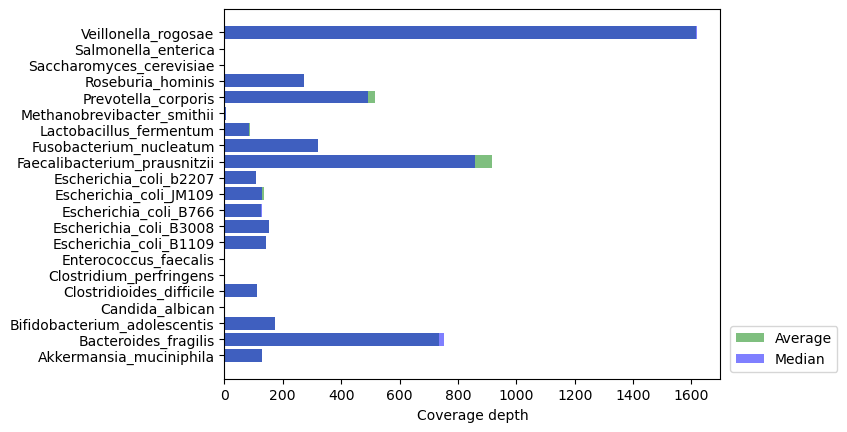

In [12]:
coverage_depth = dict(sorted(coverage_depth.items()))
average_coverage_depth = [tup[2][0] for tup in coverage_depth.values()]
median_coverage_depth = [tup[2][1] for tup in coverage_depth.values()]
reference_names = list(coverage_depth.keys())

# Creating barplots
plt.barh(reference_names, average_coverage_depth, color='green', label="Average", alpha=0.5)
plt.barh(reference_names, median_coverage_depth, color='blue', label="Median", alpha=0.5)

plt.xlabel("Coverage depth")
#plt.xlim(right=1)

plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))

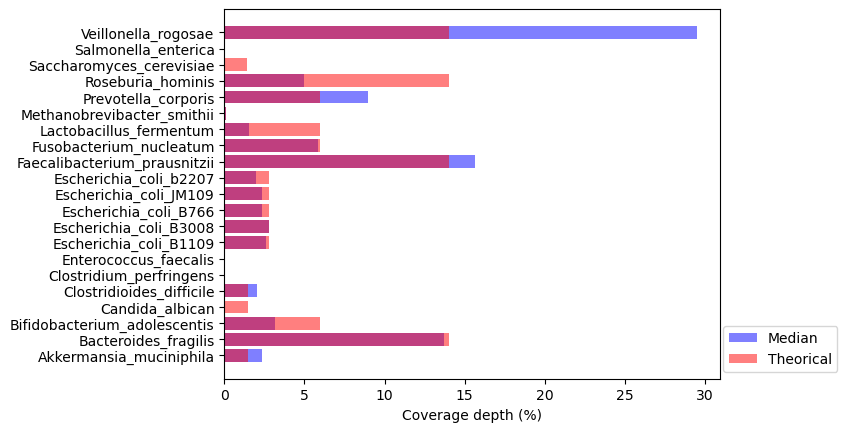

In [17]:
theorical_composition={ #Genome Copy
    "Akkermansia_muciniphila" : 1.62 ,
    "Bacteroides_fragilis" :8.33  ,
    "Bifidobacterium_adolescentis" :8.83  ,
    "Candida_albican" :0.31 ,
    "Clostridioides_difficile" : 1.10 ,
    "Clostridium_perfringens" :0.00009 ,
    "Enterococcus_faecalis" :0.0011 ,
    "Escherichia_coli_B1109" :1.77,
    "Escherichia_coli_B3008" :1.82 ,
    "Escherichia_coli_B766" :1.66,
    "Escherichia_coli_JM109" :1.82,
    "Escherichia_coli_b2207" :1.64,
    "Faecalibacterium_prausnitzii" :14.77 ,
    "Fusobacterium_nucleatum" :7.53,
    "Lactobacillus_fermentum" :9.68 ,
    "Methanobrevibacter_smithii" :0.17 ,
    "Prevotella_corporis" :6.26,
    "Roseburia_hominis" :12.43 ,
    "Saccharomyces_cerevisiae" :0.32,
    "Salmonella_enterica" :0.007 ,
    "Veillonella_rogosae" :19.94 ,
}


sums=[0,0, 0]
proportional_coverage_depth = {}
for k in coverage_depth.keys() : 
    proportional_coverage_depth[k] = [ coverage_depth[k][2][0], coverage_depth[k][2][1], theorical_composition[k]]
    sums[0] +=proportional_coverage_depth[k][0]
    sums[1] +=proportional_coverage_depth[k][1]
    sums[2] +=proportional_coverage_depth[k][2]

for k in proportional_coverage_depth.keys() : 
    proportional_coverage_depth[k] = [proportional_coverage_depth[k][0]*100 / sums[0], 
                                      proportional_coverage_depth[k][1]*100 / sums[1],  
                                      proportional_coverage_depth[k][2]*100 / sums[2]]


proportional_coverage_depth = dict(sorted(proportional_coverage_depth.items()))
average_coverage_depth = [tup[0] for tup in proportional_coverage_depth.values()]
median_coverage_depth = [tup[1] for tup in proportional_coverage_depth.values()]
theorical = [tup[2] for tup in proportional_coverage_depth.values()]
reference_names = list(proportional_coverage_depth.keys())

# Creating barplots
#plt.barh(reference_names, average_coverage_depth, color='green', label="Average", alpha=0.5)
plt.barh(reference_names, median_coverage_depth, color='blue', label="Median", alpha=0.5)
plt.barh(reference_names, theorical, color='red', label="Theorical", alpha=0.5)

plt.xlabel("Coverage depth (%)")
#plt.xlim(right=1)

plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))